<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/PID_Autoencoder_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
user = "SL"
uzem = "Szint1"
data_source="5"
fname="72C03_TC_error_toNN.csv"

In [5]:
if user=="Anna":
    path = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Data/Abb/Szint1/"
else:
    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Szteroid2/április/"

    #Üzemenkénti futtatáshoz:

    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Nor/"
    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Sp/"            #Külön kód van rá, legalul
    path = "/content/drive/MyDrive/2022Anna/Datapipeline/"+data_source+"/"+fname
    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Szint3/"
    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Szteroid2/"      #KÉSZ

In [6]:
path

'/content/drive/MyDrive/2022Anna/Datapipeline/5/72C03_TC_error_toNN.csv'

In [7]:
df=pd.read_csv(path,usecols=None)

In [8]:
df.isnull().values.any()

False

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.264137,6.015415,5.446251,4.799267,4.083618,3.041428,2.685894,2.011444,1.330891,0.615246,-0.024109,-0.628368,-1.383690,-1.562218,-2.171051,-2.241245,-2.416725,-2.595253,-2.703590,-2.738686
1,6.015415,5.446251,4.799267,4.083618,3.041428,2.685894,2.011444,1.330891,0.615246,-0.024109,-0.628368,-1.383690,-1.562218,-2.171051,-2.241245,-2.416725,-2.595253,-2.703590,-2.738686,-2.668495
2,5.446251,4.799267,4.083618,3.041428,2.685894,2.011444,1.330891,0.615246,-0.024109,-0.628368,-1.383690,-1.562218,-2.171051,-2.241245,-2.416725,-2.595253,-2.703590,-2.738686,-2.668495,-2.522011
3,4.799267,4.083618,3.041428,2.685894,2.011444,1.330891,0.615246,-0.024109,-0.628368,-1.383690,-1.562218,-2.171051,-2.241245,-2.416725,-2.595253,-2.703590,-2.738686,-2.668495,-2.522011,-2.522011
4,4.083618,3.041428,2.685894,2.011444,1.330891,0.615246,-0.024109,-0.628368,-1.383690,-1.562218,-2.171051,-2.241245,-2.416725,-2.595253,-2.703590,-2.738686,-2.668495,-2.522011,-2.522011,-2.311440


In [10]:
df.mean()

0     0.275099
1     0.268105
2     0.261123
3     0.254181
4     0.247304
5     0.240595
6     0.234082
7     0.227797
8     0.221772
9     0.216064
10    0.210661
11    0.205565
12    0.200786
13    0.196338
14    0.192123
15    0.188180
16    0.184483
17    0.181023
18    0.177781
19    0.174736
dtype: float64

In [11]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plot

df_ = df

# You must normalize the data before applying the fit method
df_normalized=(df_ - df_.mean()) / df_.std()

In [12]:
df_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05,1.277040e+05
mean,-1.869498e-17,-2.181081e-17,-2.225593e-18,-4.451185e-19,-6.231660e-18,-1.646939e-17,-2.759735e-17,-1.468891e-17,4.896304e-18,9.792608e-18,4.451185e-19,-4.896304e-18,-8.902371e-18,-2.626199e-17,8.902371e-19,1.468891e-17,2.181081e-17,-2.670711e-18,-1.602427e-17,3.115830e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.895906e+00,-8.055271e+00,-7.668737e+00,-5.317320e+00,-5.163039e+00,-5.256906e+00,-5.349243e+00,-5.439658e+00,-5.529113e+00,-5.617277e+00,-5.704422e+00,-5.791399e+00,-5.877411e+00,-5.963580e+00,-6.049740e+00,-6.136279e+00,-6.223329e+00,-6.310412e+00,-6.398242e+00,-6.486374e+00
25%,-1.581445e-01,-1.577610e-01,-1.573519e-01,-1.568200e-01,-1.561031e-01,-1.552670e-01,-1.543595e-01,-1.533965e-01,-1.524343e-01,-1.515063e-01,-1.506247e-01,-1.498227e-01,-1.490957e-01,-1.484907e-01,-1.479510e-01,-1.475170e-01,-1.471830e-01,-1.469375e-01,-1.467915e-01,-1.467252e-01
50%,-1.377125e-01,-1.369072e-01,-1.360606e-01,-1.350902e-01,-1.339444e-01,-1.326892e-01,-1.313690e-01,-1.300016e-01,-1.286392e-01,-1.275016e-01,-1.265617e-01,-1.253794e-01,-1.242766e-01,-1.232956e-01,-1.223803e-01,-1.215694e-01,-1.208569e-01,-1.202330e-01,-1.197059e-01,-1.192574e-01
75%,-1.171636e-01,-1.159340e-01,-1.146474e-01,-1.132360e-01,-1.116588e-01,-1.099821e-01,-1.082468e-01,-1.064727e-01,-1.047080e-01,-1.029891e-01,-1.013261e-01,-9.974497e-02,-9.824799e-02,-9.687276e-02,-9.556350e-02,-9.435743e-02,-9.324780e-02,-9.222708e-02,-9.130021e-02,-9.045101e-02
max,1.559852e+01,1.584859e+01,1.597510e+01,1.596124e+01,1.576417e+01,1.588602e+01,1.579051e+01,1.569333e+01,1.564437e+01,1.588582e+01,1.592920e+01,1.604883e+01,1.627636e+01,1.636763e+01,1.656657e+01,1.669496e+01,1.675664e+01,1.681729e+01,1.701101e+01,1.720388e+01


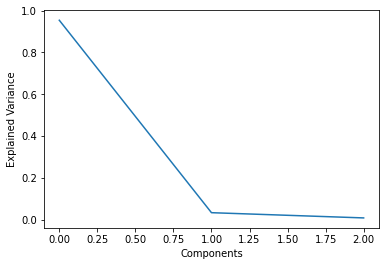

In [13]:


pca = PCA(n_components=3)
data=pca.fit_transform(df_normalized)

pca.components_

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

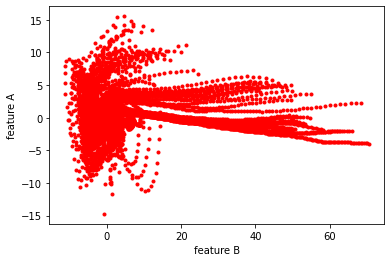

In [14]:
plot.scatter(data[:,0],data[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [15]:
len(df_normalized)

127704

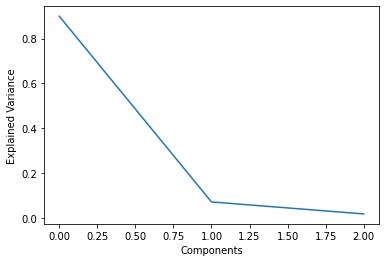

In [16]:
pca = PCA(n_components=3)

data2=pca.fit_transform(df_normalized[:-62000])


pca.components_

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

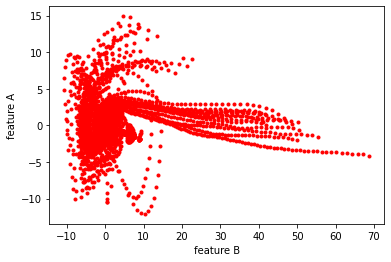

In [17]:
plot.scatter(data2[:,0],data2[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

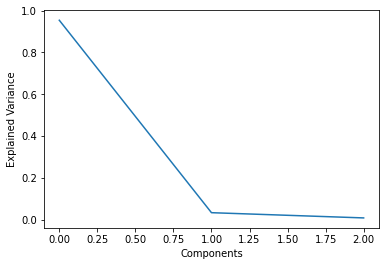

In [18]:
pca = PCA(n_components=3)
data2=pca.fit(df_normalized)
data2=pca.transform(df_normalized[0:-32000])
pca.components_

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

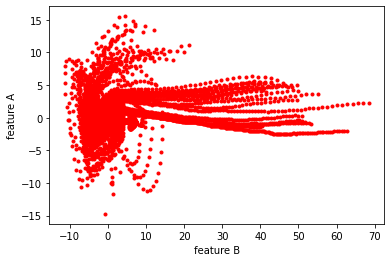

In [19]:
plot.scatter(data2[:,0],data2[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [20]:
data2=pca.transform(df_normalized[-12500:])

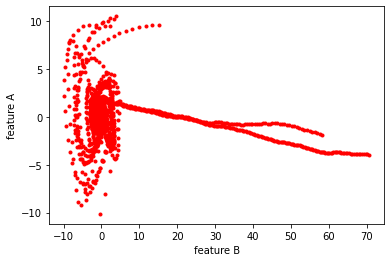

In [21]:
plot.scatter(data2[:,0],data2[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
data2=pca.transform(df_normalized[70000:80000])

In [24]:
len(df_normalized)

127704

In [25]:
db=DBSCAN(eps=0.3,min_samples=40).fit(data2)

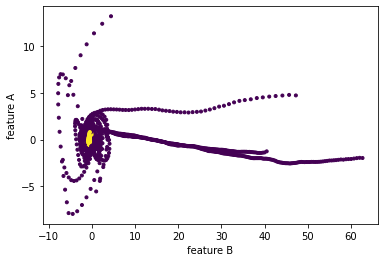

In [26]:
plot.scatter(data2[:,0],data2[:,1],c=db.labels_,marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [30]:
def pic_gen(rangex=10000):
    for i in range(13):
        data2=pca.transform(df_normalized[i*rangex:(i+1)*rangex])
        db=DBSCAN(eps=0.3,min_samples=40).fit(data2)
        plot.scatter(data2[:,0],data2[:,1],c=db.labels_,marker=".")
        plot.ylabel('feature A')
        plot.xlabel('feature B')
        plot.show()

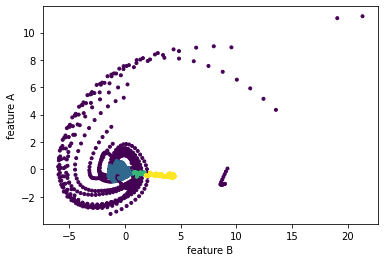

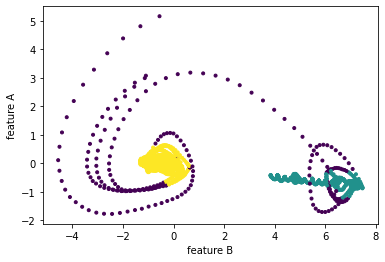

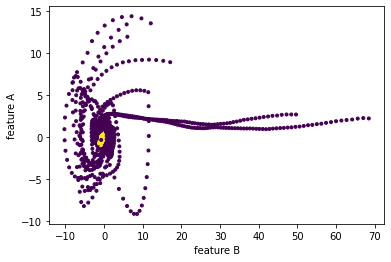

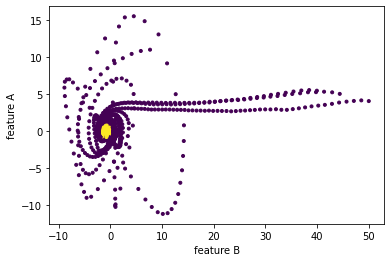

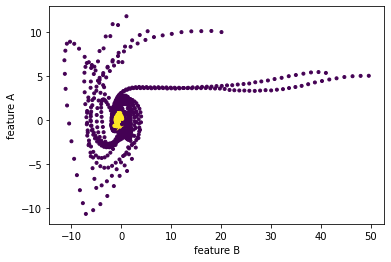

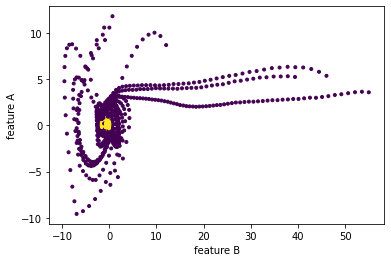

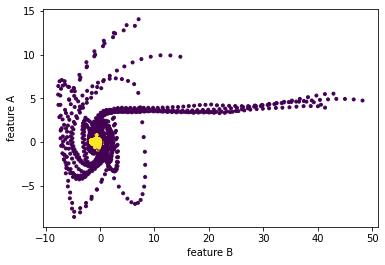

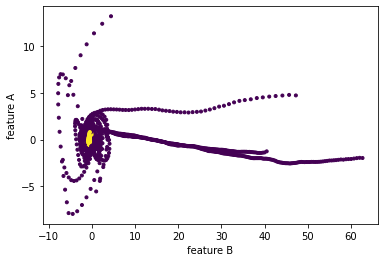

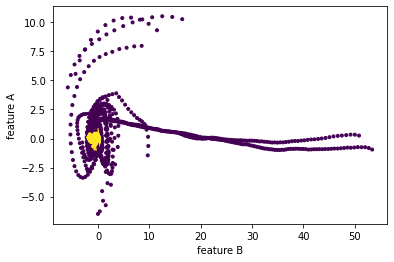

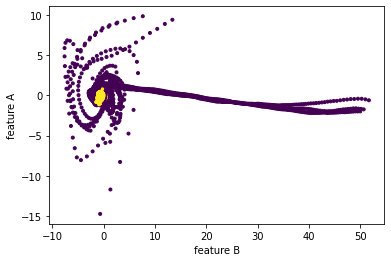

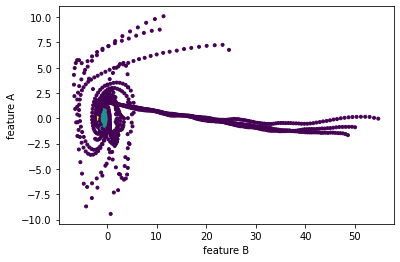

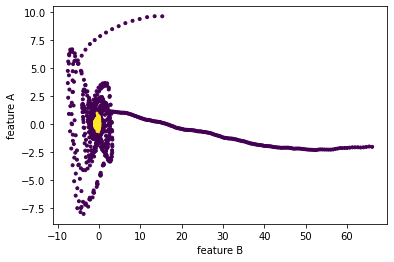

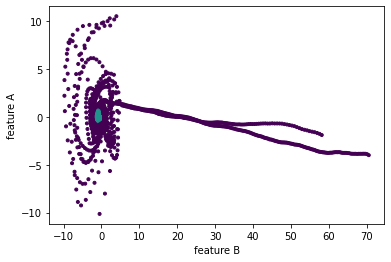

In [31]:
pic_gen()

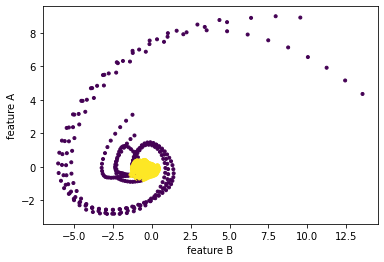

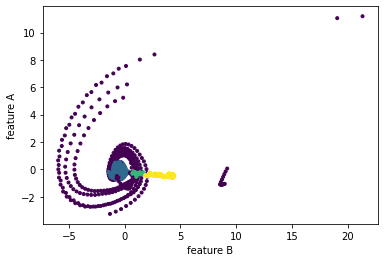

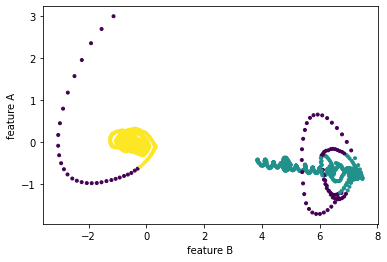

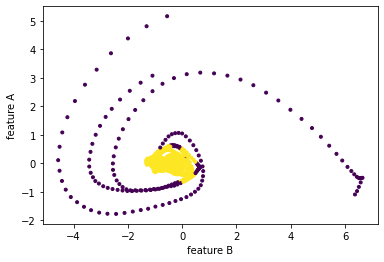

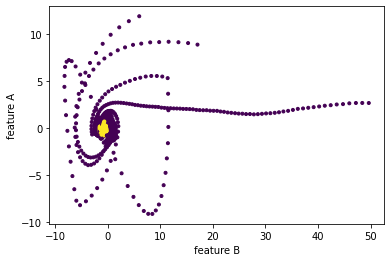

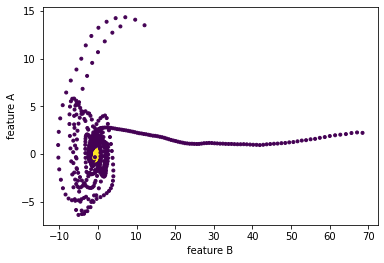

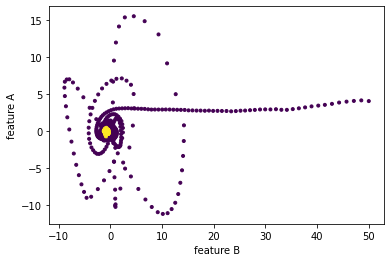

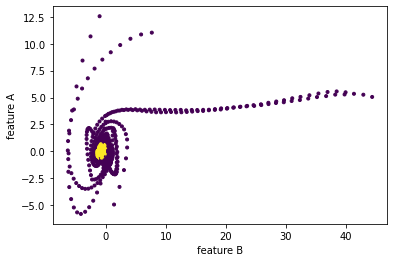

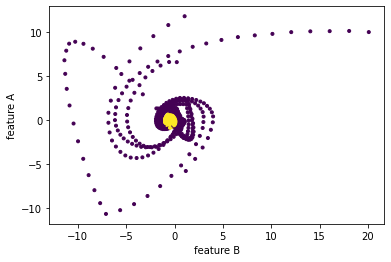

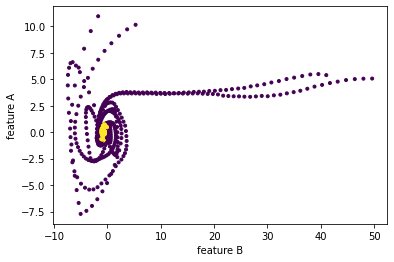

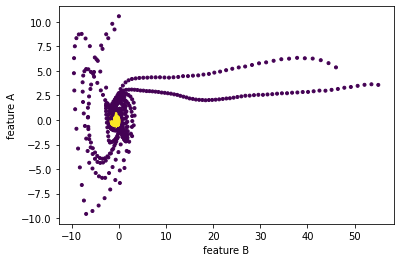

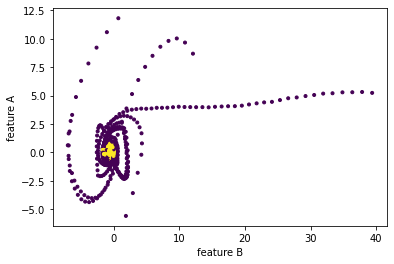

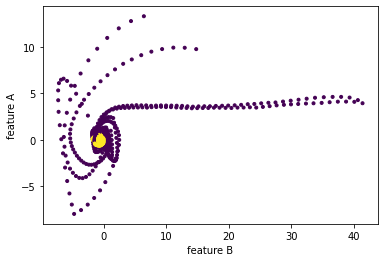

In [32]:
def pic_gen(rangex=10000):
    
    for i in range(13):
        data2=pca.transform(df_normalized[i*rangex:(i+1)*rangex])
        db=DBSCAN(eps=0.3,min_samples=40).fit(data2)
        plot.scatter(data2[:,0],data2[:,1],c=db.labels_,marker=".")
        plot.ylabel('feature A')
        plot.xlabel('feature B')
        plot.show()
pic_gen(5000)

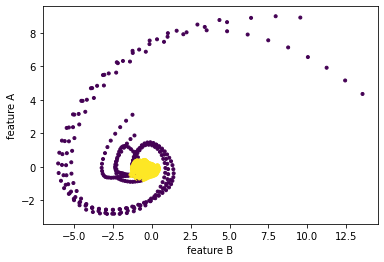

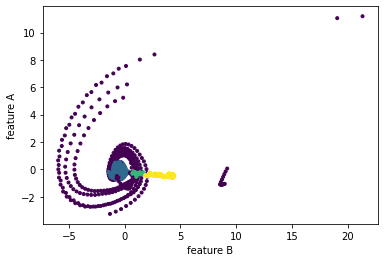

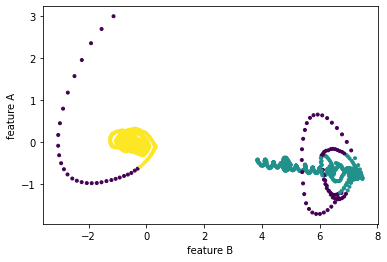

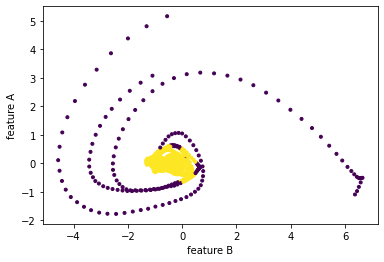

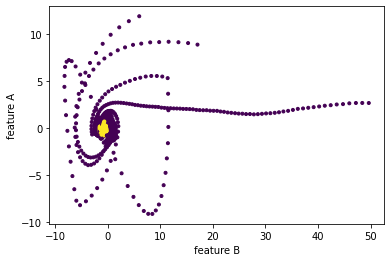

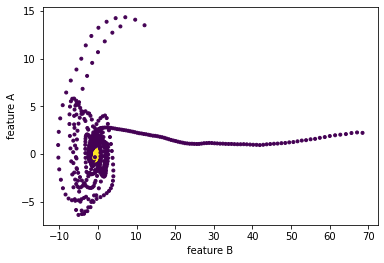

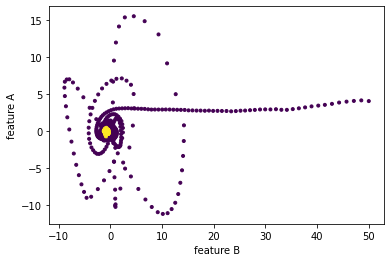

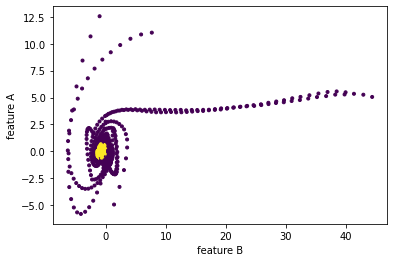

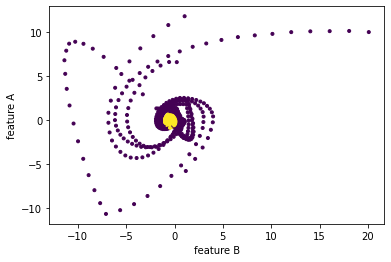

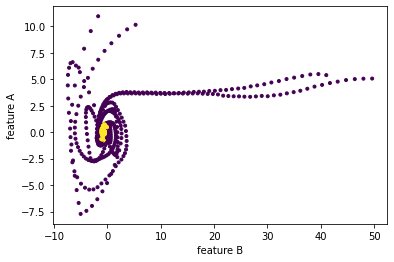

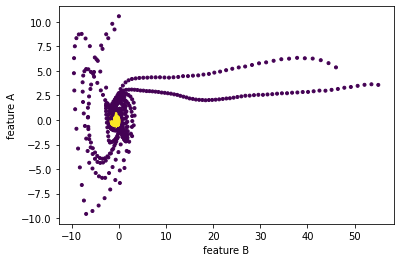

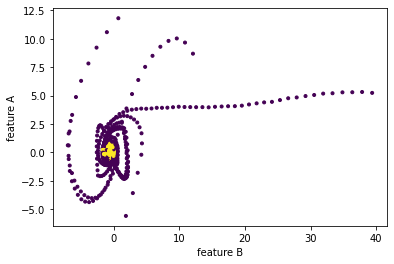

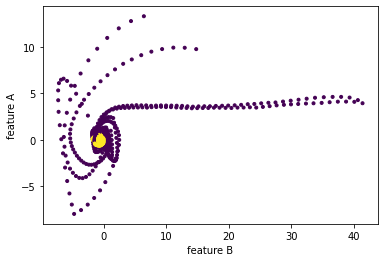

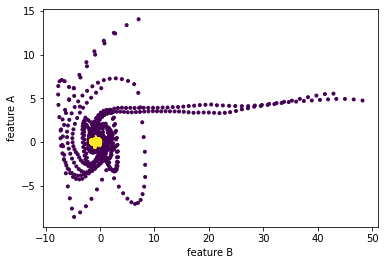

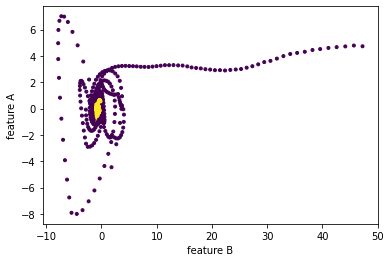

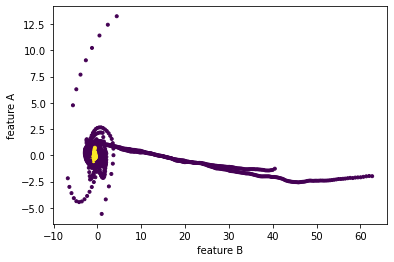

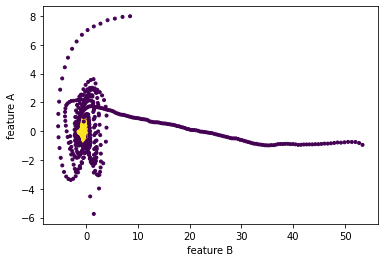

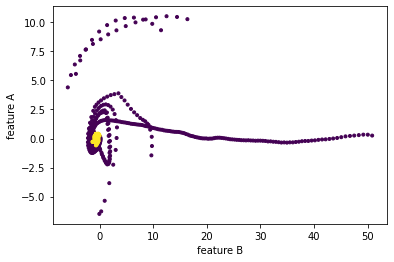

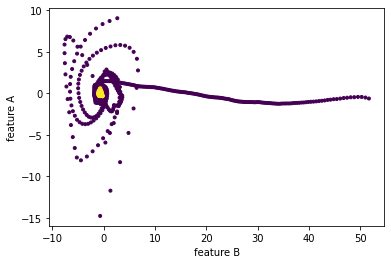

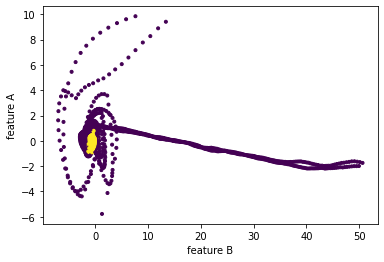

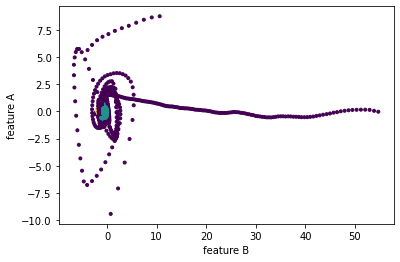

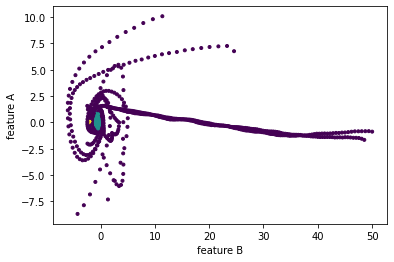

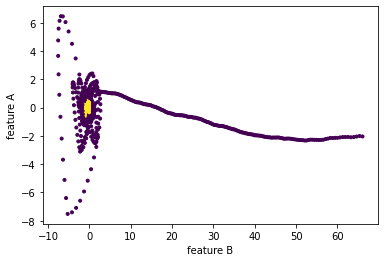

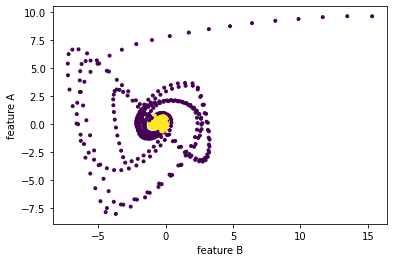

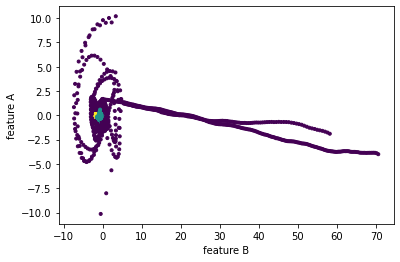

In [34]:
def pic_gen(rangex=10000):
    db=len(df_normalized)/rangex
    for i in range(int(db)):
        data2=pca.transform(df_normalized[i*rangex:(i+1)*rangex])
        db=DBSCAN(eps=0.3,min_samples=40).fit(data2)
        plot.scatter(data2[:,0],data2[:,1],c=db.labels_,marker=".")
        plot.ylabel('feature A')
        plot.xlabel('feature B')
        plot.show()
pic_gen(5000)